In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
print(df.head())

         Date  Station_1  Station_2  Station_3  Station_4  Station_5
0  2023-01-01  -1.804746  -0.278485  -1.177893  -1.640935  -2.610762
1  2023-01-02  -1.416424   1.134184  -2.932468  -1.768841   1.404773
2  2023-01-03   3.000914   0.225254   1.828947  -2.308165  -5.053805
3  2023-01-04  -3.426587  -1.825213  -3.883555  -2.350797  -5.849682
4  2023-01-05  -1.551617   1.549985  -3.123937  -0.418950  -0.665866


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15 non-null     object 
 1   Station_1  14 non-null     float64
 2   Station_2  15 non-null     float64
 3   Station_3  15 non-null     float64
 4   Station_4  15 non-null     float64
 5   Station_5  15 non-null     float64
dtypes: float64(5), object(1)
memory usage: 848.0+ bytes
None


In [5]:
df['Station_1'] = df['Station_1'].fillna(df['Station_1'].mean())
df['Station_2'] = df['Station_2'].fillna(df['Station_2'].mean())
df['Station_3'] = df['Station_3'].fillna(df['Station_3'].mean())
df['Station_4'] = df['Station_4'].fillna(df['Station_4'].mean())
df['Station_5'] = df['Station_5'].fillna(df['Station_5'].mean())

In [6]:
print(df.head(df.shape[0]))

          Date  Station_1  Station_2  Station_3  Station_4  Station_5
0   2023-01-01  -1.804746  -0.278485  -1.177893  -1.640935  -2.610762
1   2023-01-02  -1.416424   1.134184  -2.932468  -1.768841   1.404773
2   2023-01-03   3.000914   0.225254   1.828947  -2.308165  -5.053805
3   2023-01-04  -3.426587  -1.825213  -3.883555  -2.350797  -5.849682
4   2023-01-05  -1.551617   1.549985  -3.123937  -0.418950  -0.665866
5   2023-01-06  -3.158470  -3.476573  -1.438426   1.906991  -4.328986
6   2023-01-07  -1.876627  -2.269514  -4.728243  -0.749363  -4.427341
7   2023-01-08  -0.716027   0.703559   1.811676   1.814089  -4.429752
8   2023-01-09  -3.519214  -5.050178  -2.685896  -0.460223  -3.876884
9   2023-01-10  -3.624238   1.434370  -0.660717  -0.269382  -4.534469
10  2023-01-11  -3.919570  -5.962436  -3.839936   1.697508  -1.390741
11  2023-01-12  -1.710992   1.621992   0.771269  -3.620504  -2.827954
12  2023-01-13  -1.674909  -0.459747  -1.989405  -0.848078  -5.117358
13  2023-01-14  -1.3

In [7]:
x = np.array(np.arange(df.shape[0]))

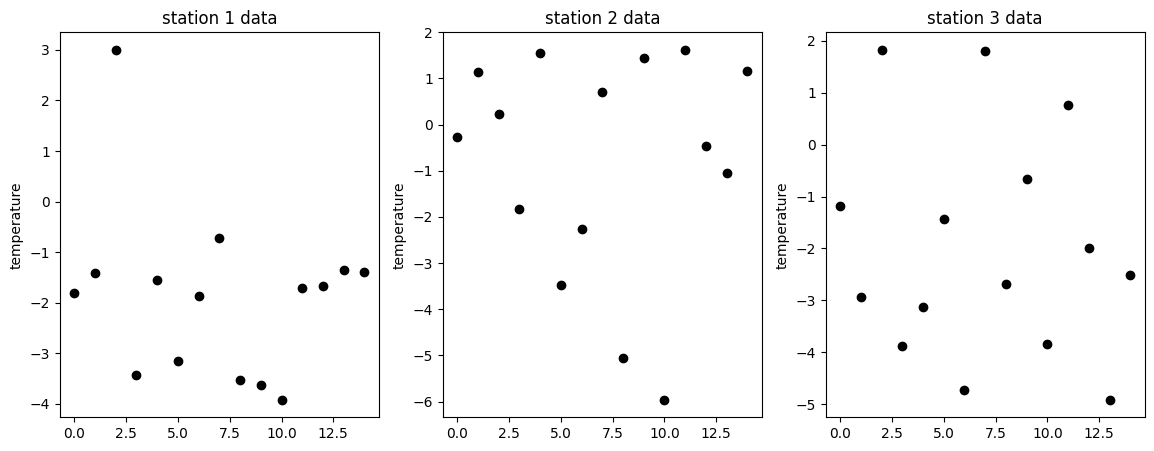

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
axes[0].scatter(x, df['Station_1'], color='black')
axes[0].set_title('station 1 data')
axes[0].set_ylabel('temperature')

axes[1].scatter(x, df['Station_2'], color='black')
axes[1].set_title('station 2 data')
axes[1].set_ylabel('temperature')

axes[2].scatter(x, df['Station_3'], color='black')
axes[2].set_title('station 3 data')
axes[2].set_ylabel('temperature')

plt.show()

In [9]:
from scipy.interpolate import splrep, splev

In [10]:
tck0 = splrep(x, df['Station_1'], k=3)
x_interpolated0 = np.linspace(min(x), max(x), 100)
y_interpolated0 = splev(x_interpolated0, tck0)

tck1 = splrep(x, df['Station_2'], k=2)
x_interpolated1 = np.linspace(min(x), max(x), 100)
y_interpolated1 = splev(x_interpolated1, tck1)

tck2 = splrep(x, df['Station_3'], k=1)
x_interpolated2 = np.linspace(min(x), max(x), 100)
y_interpolated2 = splev(x_interpolated2, tck2)

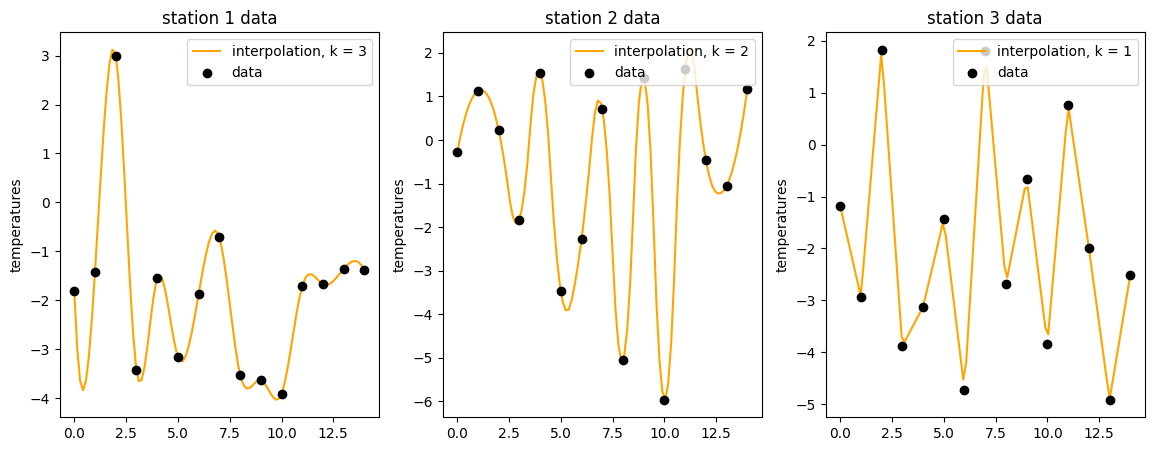

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 5))

axes[0].plot(x_interpolated0, y_interpolated0, color='orange', zorder=0, label='interpolation, k = 3')
axes[0].scatter(x, df['Station_1'], color='black', zorder=1, label='data')
axes[0].set_title('station 1 data')
axes[0].set_ylabel('temperatures')
axes[0].legend(loc='upper right')

axes[1].plot(x_interpolated1, y_interpolated1, color='orange', zorder=0, label='interpolation, k = 2')
axes[1].scatter(x, df['Station_2'], color='black', zorder=1, label='data')
axes[1].set_title('station 2 data')
axes[1].set_ylabel('temperatures')
axes[1].legend(loc='upper right')

axes[2].plot(x_interpolated2, y_interpolated2, color='orange', zorder=0, label='interpolation, k = 1')
axes[2].scatter(x, df['Station_3'], color='black', zorder=1, label='data')
axes[2].set_title('station 3 data')
axes[2].set_ylabel('temperatures')
axes[2].legend(loc='upper right')

plt.show()